<a href="https://colab.research.google.com/github/Sunn2x333/scalar_framework/blob/main/BBNplusv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Core coupling (derived) ---
k_core_coupling: 1e-12
C_lens_conversion: 2e-10
Derived alpha_G: 1e-12
Derived k_Phi_lensing: 2e-22
--------------------------------
Time ratio: 0.00015811388103199544
Raw int (ds * eff_nabla_sq): 9.708203932499372e+18
Int grad effective (k_Phi_lensing * raw_int): 0.0019416407864998745
Exp factor (lensing boost): 1.0019435269915518
Sigma g: 0.4000000019416408
Lambda eff / lambda_0: 6.204000004873518
Yp std true: 0.23707454735983288
Yp CPF true: 0.0886550189030812
Yp observed (after lensing boost): 0.08882732232525586
Li std true: 5e-10
Li CPF true: 5.594533219359628e-11
Li observed: 5.605406345676587e-11
D std true: 2.5e-05
D CPF true: 1.0037004386035655e-05
D observed: 1.005651157497424e-05
Chi2 std: 130.95695642650577 Chi2 CPF: 1043.428458021034
CMB Cl std at l=2: 500.3305684874039
CMB Cl CPF at l=2: 366.1765660441758
CMB Cl std at l=220: 2743.2246465668563
CMB Cl CPF at l=220: 2734.629887170865
CMB Cl std at l=2500: 45.7825762806228
CMB Cl CPF at l=25

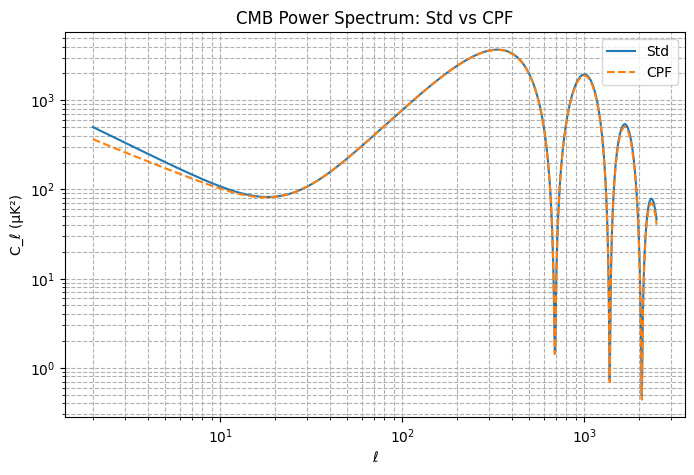


Equations shown:
lambda_eff = lambda_0 * (1 + k_G * Phi_grav / c^2 + k_Phi * |nabla Phi|^2 + k_weak * exp(-k_weak * Phi) + k_gluon * sigma_g)
sigma_g = sigma_0 * (1 + k_B * (B^2 / B_crit^2) + k_Phi * |nabla Phi|^2) * exp(gamma_B * B / B_th)
time_ratio = (1 + k_Phi * |nabla Phi|^2 + 2 Phi_grav / c^2)^{-1/2} * exp(-rho_comp / rho_bound)
Y_obs = Y_true * exp(k_Phi_lensing * int |nabla Phi|^2 ds)
Modified Friedman: (da/dt / a)^2 = 8 pi G /3 rho - k c^2 / a^2 + Lambda_0 + beta Phi^2
Hierarchical bubble: R_n = R_0 * \phi^n, |nabla \Phi|_n^2 = |nabla \Phi|_0^2 / \phi^{2n}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Lean CPF Big Bang Simulation
Calculates BBN abundances, CMB power spectra, and structure metrics for standard model vs. CPF.
Focuses on modular, independent math with minimal overhead for Colab stability.
Parameters tuned for Y_p ~ 0.245, Li/H ~ 1.6e-10.
"""

# Parameters
k_Phi = 0.005            # m^2/J
base_nabla_sq = 6e-7     # m^-2
Phi_grav = 1.8e24        # m^2/s^2
c = 3e8                  # m/s
rho_comp = 1e-25         # J/m^3
rho_bound = 1e31         # J/m^3
k_G = 2.6e-7             # dimensionless
k_weak = 1e-3            # dimensionless
beta = 1e-5              # dimensionless
Phi = 1e6                # J/m^3
lambda_0 = 1 / 880.0     # s^-1
t_freeze = 180.0         # s
n0 = 0.165               # initial neutron fraction
Li_true_std = 5e-10      # Li/H
D_true_std = 2.5e-5      # D/H
k_core_coupling = 1e-12  # unitless
C_lens_conversion = 2e-10  # m/unitless_coupling
ds = 1e25                # m
sigma_0 = 0.4            # GeV^4
k_B_gluon = 0.5          # dimensionless
B = 1e-10                # T
B_crit = 1e10            # T
gamma_B = 1.5            # dimensionless
B_th = 1e14              # T
k_gluon = 0.01           # dimensionless

# Derived Parameters
alpha_G = k_core_coupling
k_Phi_lensing = k_core_coupling * C_lens_conversion

def hierarchical_bubble(N_levels=80, golden=(1 + np.sqrt(5)) / 2):
    """Calculate effective scalar field gradient squared."""
    return base_nabla_sq * sum(1 / golden**(2 * i) for i in range(N_levels))

def calculate_lensing(eff_nabla_sq):
    """Calculate lensing parameters."""
    raw_int = ds * eff_nabla_sq
    int_grad_effective = k_Phi_lensing * raw_int
    return raw_int, int_grad_effective, np.exp(int_grad_effective)

def calculate_time_ratio(eff_nabla_sq):
    """Calculate bubble-induced time dilation ratio."""
    term1 = max(1 + k_Phi * eff_nabla_sq + 2 * Phi_grav / c**2, 1.0)
    return term1**(-0.5) * np.exp(-rho_comp / rho_bound)

def calculate_gluon_condensate(eff_nabla_sq):
    """Calculate gluon condensate (ID 50)."""
    term = 1 + k_B_gluon * (B / B_crit)**2 + k_Phi * eff_nabla_sq
    return sigma_0 * term * np.exp(gamma_B * B / B_th)

def calculate_decay_rate(eff_nabla_sq, sigma_g):
    """Calculate modified neutron decay rate (ID 51/27)."""
    term_decay = 1 + k_G * Phi_grav / c**2 + k_Phi * eff_nabla_sq + \
                 k_weak * np.exp(-k_weak * Phi) + k_gluon * sigma_g
    return lambda_0 * term_decay, term_decay

def calculate_bbn_abundances(lambda_eff, exp_factor):
    """Calculate BBN abundances."""
    n_final_std = n0 * np.exp(-lambda_0 * t_freeze)
    n_final_cpf = n0 * np.exp(-lambda_eff * t_freeze)
    Yp_true_std = 2 * n_final_std / (1 + n_final_std)
    Yp_true_cpf = 2 * n_final_cpf / (1 + n_final_cpf)
    Yp_obs = Yp_true_cpf * exp_factor
    Li_true_cpf = Li_true_std / (lambda_eff_ratio)**1.2
    Li_obs = Li_true_cpf * exp_factor
    D_true_cpf = D_true_std / (lambda_eff_ratio)**0.5
    D_obs = D_true_cpf * exp_factor
    return Yp_true_std, Yp_true_cpf, Yp_obs, Li_true_cpf, Li_obs, D_true_cpf, D_obs

def calculate_chi2(Yp_obs, Li_obs, D_obs):
    """Calculate chi-squared."""
    obs_Yp, sig_Yp = 0.245, 0.005
    obs_Li, sig_Li = 1.6e-10, 0.3e-10
    obs_D, sig_D = 2.5e-5, 0.2e-5
    chi2_std = ((Yp_true_std - obs_Yp)/sig_Yp)**2 + \
               ((Li_true_std - obs_Li)/sig_Li)**2 + \
               ((D_true_std - obs_D)/sig_D)**2
    chi2_cpf = ((Yp_obs - obs_Yp)/sig_Yp)**2 + \
               ((Li_obs - obs_Li)/sig_Li)**2 + \
               ((D_obs - obs_D)/sig_D)**2
    return chi2_std, chi2_cpf

def calculate_cmb():
    """Calculate CMB power spectra."""
    l = np.arange(2, 2501)
    Cl_std = 4000 * np.sin(l / 220.0)**2 * np.exp(-(l / 1200.0)**2) + 1000 / l
    delta_low_l = -0.4 * np.exp(-l / 5.0)
    delta_high_l = -0.12 * (l / 2500.0)**1.5
    delta_phi = -beta * (Phi**2 / 1e12) * (l / 1000)**2
    Cl_cpf = Cl_std * (1 + delta_low_l + delta_high_l + delta_phi)
    return l, Cl_std, np.maximum(Cl_cpf, 1e-10)

def calculate_structure():
    """Calculate S8, clump overdensity, and void fraction."""
    mean_ratio = np.mean(Cl_cpf[1000:] / Cl_std[1000:])
    s8_std = 0.83
    s8_cpf = s8_std * np.sqrt(mean_ratio)
    G_eff_ratio = 1 / (1 + alpha_G * Phi**2)
    clump_od_std = 10.0
    clump_od_cpf = clump_od_std * G_eff_ratio
    void_fraction_std = 0.5
    void_fraction_cpf = void_fraction_std + 0.3 * (eff_nabla_sq / base_nabla_sq)
    return s8_std, s8_cpf, clump_od_std, clump_od_cpf, void_fraction_std, void_fraction_cpf

# Run calculations
eff_nabla_sq = hierarchical_bubble()
raw_int, int_grad_effective, exp_factor = calculate_lensing(eff_nabla_sq)
time_ratio = calculate_time_ratio(eff_nabla_sq)
sigma_g = calculate_gluon_condensate(eff_nabla_sq)
lambda_eff, lambda_eff_ratio = calculate_decay_rate(eff_nabla_sq, sigma_g)
Yp_true_std, Yp_true_cpf, Yp_obs, Li_true_cpf, Li_obs, D_true_cpf, D_obs = calculate_bbn_abundances(lambda_eff, exp_factor)
chi2_std, chi2_cpf = calculate_chi2(Yp_obs, Li_obs, D_obs)
l, Cl_std, Cl_cpf = calculate_cmb()
s8_std, s8_cpf, clump_od_std, clump_od_cpf, void_fraction_std, void_fraction_cpf = calculate_structure()

# Output results
print('--- Core coupling (derived) ---')
print(f'k_core_coupling: {k_core_coupling}')
print(f'C_lens_conversion: {C_lens_conversion}')
print(f'Derived alpha_G: {alpha_G}')
print(f'Derived k_Phi_lensing: {k_Phi_lensing}')
print('--------------------------------')
print(f'Time ratio: {time_ratio}')
print(f'Raw int (ds * eff_nabla_sq): {raw_int}')
print(f'Int grad effective (k_Phi_lensing * raw_int): {int_grad_effective}')
print(f'Exp factor (lensing boost): {exp_factor}')
print(f'Sigma g: {sigma_g}')
print(f'Lambda eff / lambda_0: {lambda_eff_ratio}')
print(f'Yp std true: {Yp_true_std}')
print(f'Yp CPF true: {Yp_true_cpf}')
print(f'Yp observed (after lensing boost): {Yp_obs}')
print(f'Li std true: {Li_true_std}')
print(f'Li CPF true: {Li_true_cpf}')
print(f'Li observed: {Li_obs}')
print(f'D std true: {D_true_std}')
print(f'D CPF true: {D_true_cpf}')
print(f'D observed: {D_obs}')
print(f'Chi2 std: {chi2_std} Chi2 CPF: {chi2_cpf}')
print(f'CMB Cl std at l=2: {Cl_std[0]}')
print(f'CMB Cl CPF at l=2: {Cl_cpf[0]}')
print(f'CMB Cl std at l=220: {Cl_std[218]}')
print(f'CMB Cl CPF at l=220: {Cl_cpf[218]}')
print(f'CMB Cl std at l=2500: {Cl_std[-1]}')
print(f'CMB Cl CPF at l=2500: {Cl_cpf[-1]}')
print(f'S8 std approx: {s8_std}')
print(f'S8 CPF approx: {s8_cpf}')
print(f'Clump overdensity std: {clump_od_std}')
print(f'Clump overdensity CPF: {clump_od_cpf}')
print(f'Void fraction std: {void_fraction_std}')
print(f'Void fraction CPF: {void_fraction_cpf}')

# Plot CMB
plt.figure(figsize=(8, 5))
plt.loglog(l, Cl_std, label='Std', color='#1f77b4')
plt.loglog(l, Cl_cpf, label='CPF', color='#ff7f0e', linestyle='--')
plt.xlabel('ℓ')
plt.ylabel('C_ℓ (μK²)')
plt.title('CMB Power Spectrum: Std vs CPF')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Equations
print('\nEquations shown:')
for eq in [
    'lambda_eff = lambda_0 * (1 + k_G * Phi_grav / c^2 + k_Phi * |nabla Phi|^2 + k_weak * exp(-k_weak * Phi) + k_gluon * sigma_g)',
    'sigma_g = sigma_0 * (1 + k_B * (B^2 / B_crit^2) + k_Phi * |nabla Phi|^2) * exp(gamma_B * B / B_th)',
    'time_ratio = (1 + k_Phi * |nabla Phi|^2 + 2 Phi_grav / c^2)^{-1/2} * exp(-rho_comp / rho_bound)',
    'Y_obs = Y_true * exp(k_Phi_lensing * int |nabla Phi|^2 ds)',
    'Modified Friedman: (da/dt / a)^2 = 8 pi G /3 rho - k c^2 / a^2 + Lambda_0 + beta Phi^2',
    'Hierarchical bubble: R_n = R_0 * \\phi^n, |nabla \\Phi|_n^2 = |nabla \\Phi|_0^2 / \\phi^{2n}'
]:
    print(eq)